# 🍷 Wine Quality Prediction Analysis

## Comprehensive Machine Learning Analysis using Real Wine Data

Welcome to the Wine Quality Prediction project! We'll analyze the **WineQT.csv** dataset to build machine learning models that predict wine quality based on chemical properties.

## 🎯 Project Objectives
- **Data Exploration**: Understand wine dataset structure and characteristics
- **Feature Analysis**: Investigate how chemical properties relate to quality
- **Machine Learning**: Build and compare multiple prediction models
- **Insights**: Discover which factors most influence wine quality

## 📊 Dataset Overview
The WineQT dataset contains **1,143 real wine samples** with:
- **11 chemical/physical features**: acidity, sugar, chlorides, sulfur dioxide, density, pH, sulphates, alcohol
- **1 target variable**: quality score (rated 3-9)
- **Real-world data**: Authentic measurements from wine testing

---

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🍷 Ready to analyze wine quality data!")

📚 Libraries imported successfully!
🍷 Ready to analyze wine quality data!


In [2]:
# Load and Explore the WineQT Dataset
print("🍷 Loading WineQT dataset...")

# Load the real wine quality dataset
wine_data = pd.read_csv('../data/WineQT.csv')

print(f"📊 Dataset Overview:")
print(f"Total wine samples: {len(wine_data)}")
print(f"Number of features: {len(wine_data.columns)-1}")  # Exclude target
print(f"Dataset shape: {wine_data.shape}")

print(f"\n📋 First 5 wine samples:")
print(wine_data.head())

print(f"\n🏷️ Feature Names:")
print(wine_data.columns.tolist())

print(f"\n🍷 Wine Quality Distribution:")
print(wine_data['quality'].value_counts().sort_index())

print(f"\n📊 Quality Statistics:")
print(f"Quality range: {wine_data['quality'].min()}-{wine_data['quality'].max()}")
print(f"Average quality: {wine_data['quality'].mean():.2f}")
print(f"Most common quality: {wine_data['quality'].mode().iloc[0]}")

print(f"\n✅ Dataset loaded and explored successfully!")

🍷 Loading WineQT dataset...
📊 Dataset Overview:
Total wine samples: 1143
Number of features: 12
Dataset shape: (1143, 13)

📋 First 5 wine samples:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4             

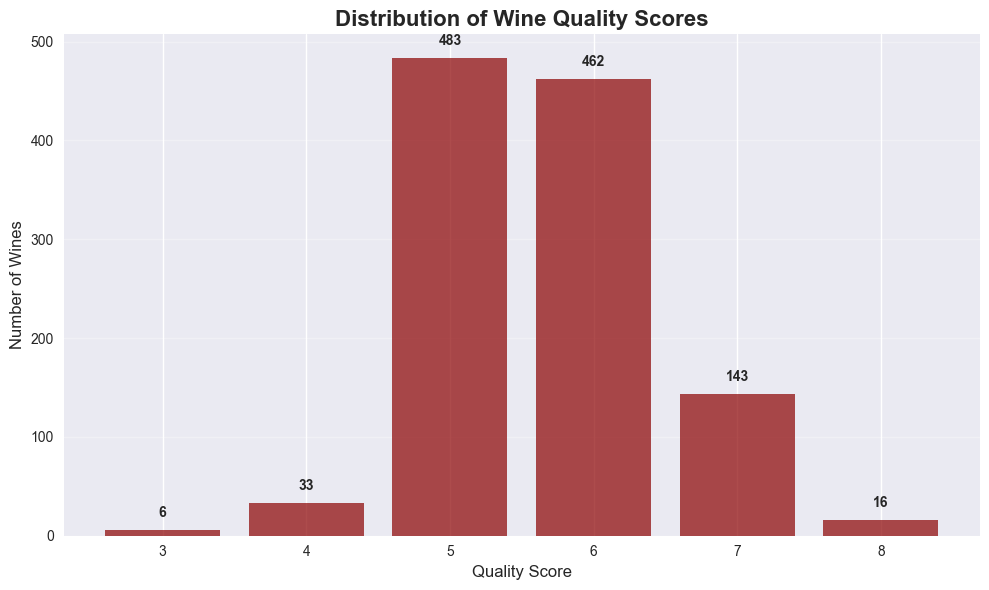

📈 Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000       

In [3]:
# Visualize Quality Distribution
plt.figure(figsize=(10, 6))
quality_counts = wine_data['quality'].value_counts().sort_index()
bars = plt.bar(quality_counts.index, quality_counts.values, color='darkred', alpha=0.7)
plt.title('Distribution of Wine Quality Scores', fontsize=16, fontweight='bold')
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.xticks(quality_counts.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary
print("📈 Statistical Summary:")
print(wine_data.describe())